In [1]:
import os
import sys
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cupy as cp

In [2]:
# Change the working directory to the parent directory to allow importing the segadb package.
notebook_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..', '..'))
sys.path.append(parent_dir)

# from sega_learn.neural_networks import *

# print(f"Working directory: {notebook_dir}")
# print(f"Parent directory: {parent_dir}")

In [3]:
def time_function(func, num_repeats, *args, **kwargs):
    times = []
    for _ in range(num_repeats):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        times.append(end_time - start_time)
    avg_time = np.mean(times)
    stddev_time = np.std(times)
    return avg_time, stddev_time, result

In [4]:
from test_nn import *
from test_nn_cupy import *
from test_nn_numba import *

## Run Time Comparison of Neural Network Implementations
### Comparison of CPU (numpy) and CPU (cupy) implementations

In [5]:
# Constants for testing
num_repeats = 10

# Neural Network Timing
nnt_layer_sizes_multiplier = 5
nnt_dataset_size = 100_000

# Optimizer Timing
optt_layer_sizes_multiplier = 25

# Loss Function Timing
losst_layer_sizes_multiplier = 10
losst_dataset_size = 1_000_000

# Train Epoch Timing
epocht_layer_sizes_multiplier = 2
epocht_dataset_sizes = [1_000, 5_000, 10_000, 50_000, 100_000, 250_000, 500_000]

In [6]:
# Compile Numba functions
init_compile()

Compiling Numba functions:   0%|          | 0/33 [00:00<?, ?it/s]

Numba functions compiled successfully.


#### Neural Network Timing

In [7]:
print("Base NN Timing Implementation:")
nn_base = time_nn_base(num_repeats, nnt_layer_sizes_multiplier, nnt_dataset_size)

print("\n\nCuPy NN Timing Implementation:")
nn_cupy = time_nn_cupy(num_repeats, nnt_layer_sizes_multiplier, nnt_dataset_size)

print("\n\nNumba NN Timing Implementation:")
nn_numba = time_nn_numba(num_repeats, nnt_layer_sizes_multiplier, nnt_dataset_size)

Base NN Timing Implementation:

Timing results for NeuralNetwork methods (averaged over 10 runs):
Performance for Layer sizes: [500, 250, 50], Dataset size: 100,000 samples
----------------------------------------------------------------------------------------------------
Function            : Average Time (s) ±  Std Dev (s)
forward             : 0.795160 seconds ± 0.029126 seconds
apply_dropout       : 0.634602 seconds ± 0.015916 seconds
backward            : 0.505841 seconds ± 0.022955 seconds
calculate_loss      : 0.608270 seconds ± 0.018412 seconds
evaluate            : 0.481094 seconds ± 0.013672 seconds
train (X,y Reduced) : 0.957330 seconds ± 0.028719 seconds


CuPy NN Timing Implementation:

Timing results for NeuralNetwork methods (averaged over 10 runs):
Performance for Layer sizes: [500, 250, 50], Dataset size: 100,000 samples
----------------------------------------------------------------------------------------------------
Function            : Average Time (s) ±  Std De

#### Optimizer Timing

In [8]:
print("Base NN Optimizer Implementation:")
nn_optimizer_times = time_nn_optimizer(num_repeats, optt_layer_sizes_multiplier)

print("\n\nCuPy NN Optimizer Implementation:")
nn_optimizer_times_cupy = time_nn_optimizer_cupy(num_repeats, optt_layer_sizes_multiplier)

print("\n\nNumba NN Optimizer Implementation:")
nn_optimizer_times_numba = time_nn_optimizer_numba(num_repeats, optt_layer_sizes_multiplier)

Base NN Optimizer Implementation:

Timing results for Optimizer methods (averaged over 10 runs):
Performance for Layer sizes: [2500, 1875, 1250, 625]
----------------------------------------------------------------------------------------------------
Optimizer Function       : Average Time (s) ±  Std Dev (s)
Adam_initialize          : 0.020701 seconds ± 0.000397 seconds
SGD_initialize           : 0.010482 seconds ± 0.003102 seconds
Adadelta_initialize      : 0.020301 seconds ± 0.000458 seconds
----------------------------------------------------------------------
Adam_update              : 0.278713 seconds ± 0.005110 seconds
SGD_update               : 0.100041 seconds ± 0.006244 seconds
Adadelta_update          : 0.314240 seconds ± 0.005240 seconds


CuPy NN Optimizer Implementation:

Timing results for Optimizer methods (averaged over 10 runs):
Performance for Layer sizes: [2500, 1875, 1250, 625]
-----------------------------------------------------------------------------------------

#### Loss Function Timing

In [9]:
print("Base NN Loss Implementation:")
nn_loss_base = time_nn_loss(num_repeats, losst_layer_sizes_multiplier, losst_dataset_size)

print("\n\nCuPy NN Loss Implementation:")
nn_loss_cupy = time_nn_loss_cupy(num_repeats, losst_layer_sizes_multiplier, losst_dataset_size)

print("\n\nNumba NN Loss Implementation:")
nn_loss_numba = time_nn_loss_numba(num_repeats, losst_layer_sizes_multiplier, losst_dataset_size)

Base NN Loss Implementation:

Timing results for Loss functions (averaged over 10 runs):
Performance for Layer sizes: [1000, 500, 100], Dataset size: 1,000,000 samples
----------------------------------------------------------------------------------------------------
Loss Function            : Average Time (s) ±  Std Dev (s)
CrossEntropyLoss         : 2.444455 seconds ± 0.056308 seconds
BCEWithLogitsLoss        : 0.038499 seconds ± 0.003353 seconds


CuPy NN Loss Implementation:

Timing results for Loss functions (averaged over 10 runs):
Performance for Layer sizes: [1000, 500, 100], Dataset size: 1,000,000 samples
----------------------------------------------------------------------------------------------------
Loss Function            : Average Time (s) ±  Std Dev (s)
CrossEntropyLoss         : 0.396545 seconds ± 0.101664 seconds
BCEWithLogitsLoss        : 0.004800 seconds ± 0.010409 seconds


Numba NN Loss Implementation:

Timing results for Loss functions (averaged over 10 runs)

#### Epoch Timings

In [10]:
print("Base NN Single Epoch Implementation:")
nn_epoch_base = time_nn_epoch(num_repeats, epocht_layer_sizes_multiplier, epocht_dataset_sizes, save_csv=False)

print("\n\nCuPy NN Single Epoch Implementation:")
nn_epoch_cupy = time_nn_epoch_cupy(num_repeats, epocht_layer_sizes_multiplier, epocht_dataset_sizes, save_csv=False)

print("\n\nNumba NN Single Epoch Implementation:")
nn_epoch_numba = time_nn_epoch_numba(num_repeats, epocht_layer_sizes_multiplier, epocht_dataset_sizes, save_csv=False)

Base NN Single Epoch Implementation:

Timing results for NeuralNetwork train method (averaged over 10 runs):
Performance for Layer sizes: [200, 100, 20]
----------------------------------------------------------------------------------------------------
Dataset Size        : Average Time (s) ±  Std Dev (s)
1,000               : 0.010628 seconds ± 0.006132 seconds
5,000               : 0.050812 seconds ± 0.007502 seconds
10,000              : 0.095681 seconds ± 0.008200 seconds
50,000              : 0.491065 seconds ± 0.046140 seconds
100,000             : 0.926600 seconds ± 0.024945 seconds
250,000             : 2.268781 seconds ± 0.036953 seconds
500,000             : 4.460832 seconds ± 0.061649 seconds


CuPy NN Single Epoch Implementation:

Timing results for NeuralNetwork train method (averaged over 10 runs):
Performance for Layer sizes: [200, 100, 20]
----------------------------------------------------------------------------------------------------
Dataset Size        : Average 

## Visualization of Neural Network Timing Results

### Setup

In [11]:
# Combine results from CPU, CuPy, and Numba
def combine_results(*results_dicts):
    combined_results = []
    for results_dict in results_dicts:
        for func_name, (avg_time, stddev_time) in results_dict.items():
            combined_results.append([func_name, avg_time, stddev_time])
    
    # Create DataFrame from collected results
    results = pd.DataFrame(combined_results, columns=["Function", "Average Time (s)", "Std Dev (s)"])
    
    return results

In [12]:
cpu_results = combine_results(nn_base, nn_optimizer_times, nn_loss_base)
cupy_results = combine_results(nn_cupy, nn_optimizer_times_cupy, nn_loss_cupy)
numba_results = combine_results(nn_numba, nn_optimizer_times_numba, nn_loss_numba)

In [13]:
# Add a column to distinguish CPU and CuPy results
cpu_results["Implementation"] = "CPU"
cupy_results["Implementation"] = "CuPy"
numba_results["Implementation"] = "Numba"

# Combine the datasets
results = pd.concat([cpu_results, cupy_results, numba_results])
results

,Function,Average Time (s),Std Dev (s),Implementation
0,forward,0.795160,0.029126,CPU
1,apply_dropout,0.634602,0.015916,CPU
2,backward,0.505841,0.022955,CPU
3,calculate_loss,0.608270,0.018412,CPU
4,evaluate,0.481094,0.013672,CPU
5,train,0.957330,0.028719,CPU
6,Adam_initialize,0.020701,0.000397,CPU
7,Adam_update,0.278713,0.005110,CPU
8,SGD_initialize,0.010482,0.003102,CPU
9,SGD_update,0.100041,0.006244,CPU


In [14]:
# Create a pivot table for easier comparison
pivot_results = results.pivot(index='Function', columns='Implementation', values='Average Time (s)').reset_index()
pivot_results['Speedup (%) CuPy'] = ((pivot_results['CPU'] - pivot_results['CuPy']) / pivot_results['CPU'] * 100)
pivot_results['Speedup (%) Numba'] = ((pivot_results['CPU'] - pivot_results['Numba']) / pivot_results['CPU'] * 100)

# Sort functions by CPU execution time for better readability
pivot_results = pivot_results.sort_values('CPU', ascending=False)
pivot_results

Implementation,Function,CPU,CuPy,Numba,Speedup (%) CuPy,Speedup (%) Numba
5,CrossEntropyLoss,2.444455,0.396545,0.242604,83.777775,90.075328
13,train,0.957330,0.911864,0.369997,4.749184,61.351093
12,forward,0.795160,0.152477,0.626762,80.824327,21.177854
8,apply_dropout,0.634602,0.000800,0.240824,99.873961,62.051175
10,calculate_loss,0.608270,0.325365,0.425447,46.509731,30.056181
9,backward,0.505841,0.174935,0.574821,65.417028,-13.636714
11,evaluate,0.481094,0.150767,0.430205,68.661717,10.577881
1,Adadelta_update,0.314240,0.067000,0.096628,78.678785,69.250167
3,Adam_update,0.278713,0.002307,0.108197,99.172263,61.179778
7,SGD_update,0.100041,0.000000,0.056430,100.000000,43.593796


In [15]:
_nn_epoch_base = pd.DataFrame(nn_epoch_base, columns=['Dataset Size', 'Average Time (s)', 'Std Dev (s)'])
_nn_epoch_base["Implementation"] = "CPU"

_nn_epoch_cupy = pd.DataFrame(nn_epoch_cupy, columns=['Dataset Size', 'Average Time (s)', 'Std Dev (s)'])
_nn_epoch_cupy["Implementation"] = "CuPy"

_nn_epoch_numba = pd.DataFrame(nn_epoch_numba, columns=['Dataset Size', 'Average Time (s)', 'Std Dev (s)'])
_nn_epoch_numba["Implementation"] = "Numba"

# Combine the datasets
epoch_results = pd.concat([_nn_epoch_base, _nn_epoch_cupy, _nn_epoch_numba])
epoch_results

,Dataset Size,Average Time (s),Std Dev (s),Implementation
0,1000,0.010628,0.006132,CPU
1,5000,0.050812,0.007502,CPU
2,10000,0.095681,0.008200,CPU
3,50000,0.491065,0.046140,CPU
4,100000,0.926600,0.024945,CPU
5,250000,2.268781,0.036953,CPU
6,500000,4.460832,0.061649,CPU
0,1000,0.031802,0.017506,CuPy
1,5000,0.066286,0.008424,CuPy
2,10000,0.123108,0.002907,CuPy


In [16]:
# Set Seaborn style with improved readability
sns.set_theme(style="whitegrid", font_scale=1.2)
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['font.family'] = 'sans-serif'

### Visualizations

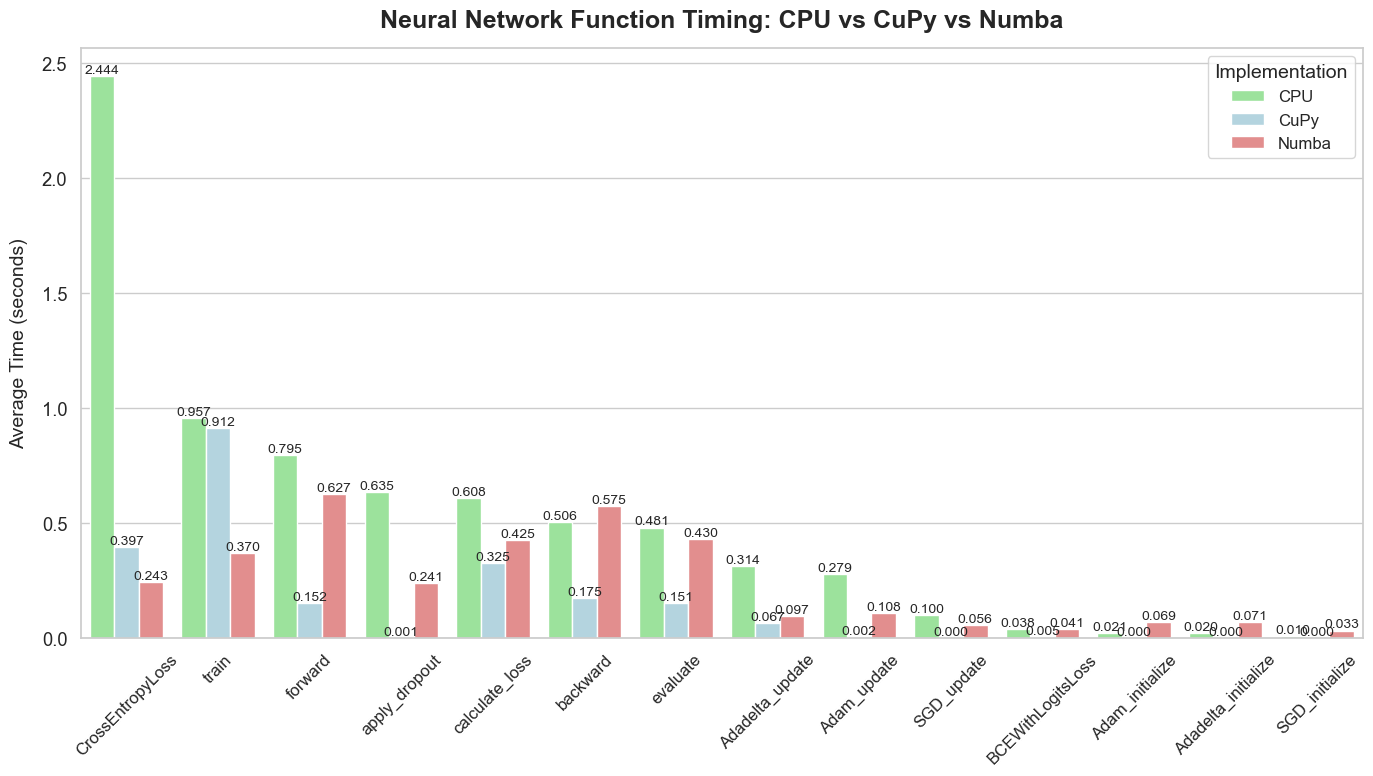

In [17]:
# First plot: Timing comparison
plt.figure(figsize=(14, 8))
melted_data = pd.melt(pivot_results, id_vars=['Function'], value_vars=['CPU', 'CuPy', 'Numba'])
melted_data.rename(columns={'variable': 'Implementation'}, inplace=True)

sns.barplot(x='Function', y='value', hue='Implementation', 
            data=melted_data,
            palette=['lightgreen', 'lightblue', 'lightcoral'])

plt.title('Neural Network Function Timing: CPU vs CuPy vs Numba', fontsize=18, fontweight='bold')
plt.ylabel('Average Time (seconds)', fontsize=14)
plt.xlabel('')
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Implementation', fontsize=12, title_fontsize=14)

# Add value labels on bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.3f', fontsize=10)

plt.tight_layout()
plt.show()

In [18]:
# # Second plot: Speedup percentage
# pivot_results.sort_values('Speedup (%)', ascending=False)

# plt.figure(figsize=(14, 8))
# speedup_bars = sns.barplot(x='Function', y='Speedup (%)', data=pivot_results, hue='Function')
# plt.title('CuPy Speedup Percentage Compared to CPU', fontsize=18, fontweight='bold')
# plt.ylabel('Speedup (%)', fontsize=14)
# plt.xlabel('Function', fontsize=14)
# plt.xticks(rotation=45, fontsize=12)
# plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)

# # Add value labels on speedup bars
# for i, v in enumerate(pivot_results['Speedup (%)']):
#     plt.text(i, max(v + 5, 5) if v > 0 else v - 15, 
#              f"{v:.1f}%", ha='center', fontsize=10, 
#              fontweight='bold', color='black')

# # Highlight negative speedups (where CPU is faster)
# for i, v in enumerate(pivot_results['Speedup (%)']):
#     if v < 0:
#         speedup_bars.patches[i].set_facecolor('#FF7F7F')  # Light red for negative speedup

# plt.tight_layout()
# plt.show()

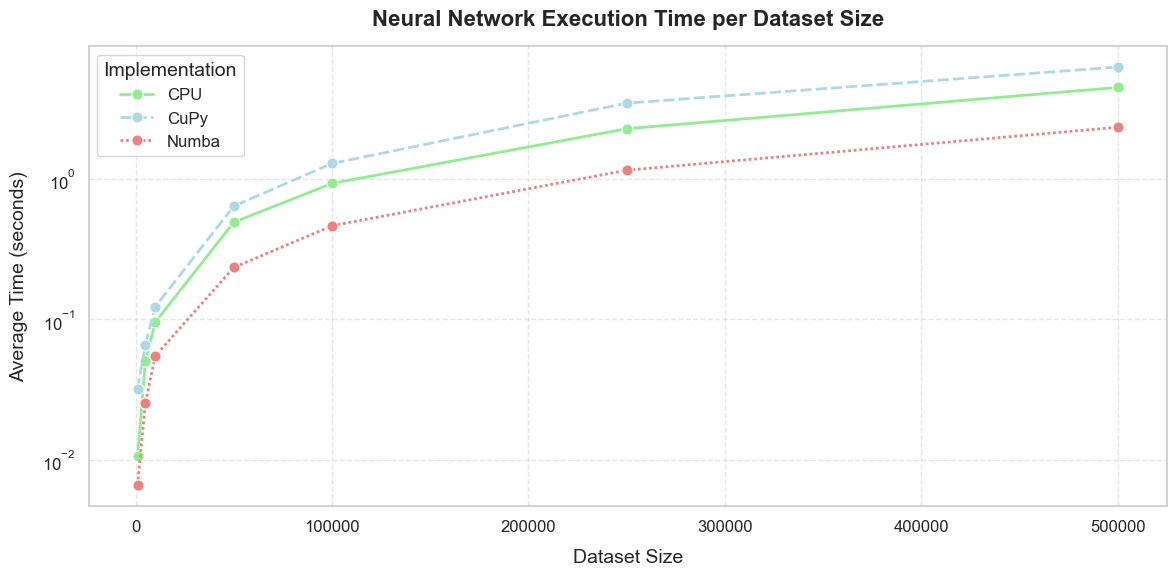

In [19]:
# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=epoch_results, x="Dataset Size", y="Average Time (s)", 
             hue="Implementation", marker="o", 
             palette=["lightgreen", "lightblue", "lightcoral"],
             linewidth=2, markersize=8, 
             err_style="bars", err_kws={'capsize': 4}, 
             style="Implementation")

# Add title and labels
plt.title("Neural Network Execution Time per Dataset Size", fontsize=16, fontweight="bold")
plt.xlabel("Dataset Size", fontsize=14)
plt.ylabel("Average Time (seconds)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Implementation", fontsize=12, title_fontsize=14)

# log scale
plt.yscale("log")

# Show the plot
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
